In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
from scipy.stats import norm
import concurrent.futures
from run_experiments import * 
import matplotlib.pyplot as plt

# Question 1

In [2]:
# init parameters, same for question 1 and 2
m = 2000
d = 2000
s = d/100
iterations = 100*d

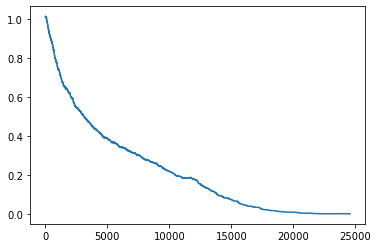

In [3]:
# check everything is working 
beta = 10
run_exp = RunExperiment(beta, m, d, s)
plt.plot(run_exp.get_sampling_losses(iterations))

In [42]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
best_beta = 0
best_loss = math.inf
best_iterations = math.inf

for beta in [3, 5, 10, 20, 50, 100]: 
    print('beta=', beta)
    loss, n_iterations = run_multiple_experiments(10, beta, m, d, s, fixed_ones=False, sign=False, iterations = iterations)

    if loss <= best_loss and n_iterations <= best_iterations: 
        best_beta = beta
        best_loss = loss
        best_iterations = n_iterations

print('beta=', best_beta, 'n_iterations=',best_iterations, best_loss)

beta= 10
beta= 20
beta= 30
beta= 50
beta= 80
beta= 100
beta= 200
beta= 500
beta= 1000
beta= 10 n_iterations= 39986.2 0.0


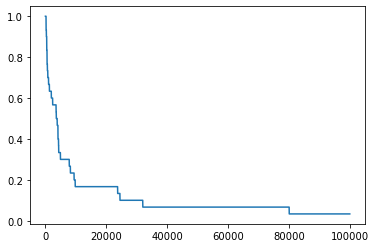

In [62]:
run_exp = RunExperiment(5, m, d, s, fixed_ones=True)
res = run_exp.get_sampling_losses(100000, change_beta_every= 5000, update_beta=lambda x : x * 1.4)
plt.plot(res, label = 'beta=100')

In [74]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
# searching for best beta and simulation technique
best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [0.01, 0.05, 0.1, 0.5, 1, 5, 10]: 
    for increse_every in [2, 5, 10, 100, 1000, 1500, 2000, 3000]: 
        for multiplicative_increase in [1.00001,1.0001, 1.0005, 1.001, 1.01, 1.1, 1.2, 1.3]:
            mse, required_iterations = run_multiple_experiments(5, beta, m, d, s, fixed_ones=False, sign=False, iterations = iterations, change_beta_every= increse_every, update_beta=lambda x : x * multiplicative_increase)
            # mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}
                print(best_params_and_scores, 'required_iterations', required_iterations)

print(best_mse, best_n_iterations)
print(best_params_and_scores)

{'beta_start': 0.01, 'increase_every': 2, 'multiplicative_increase': 1.00001} required_iterations 40314.2


/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in double_scalars
  comp = np.exp(-self.beta * (new_noise - old_noise))


{'beta_start': 0.01, 'increase_every': 10, 'multiplicative_increase': 1.00001} required_iterations 36663.0
{'beta_start': 1, 'increase_every': 2, 'multiplicative_increase': 1.00001} required_iterations 36555.8
{'beta_start': 10, 'increase_every': 1500, 'multiplicative_increase': 1.00001} required_iterations 36404.2
0.0 36404.2
{'beta_start': 10, 'increase_every': 1500, 'multiplicative_increase': 1.00001}


In [ ]:
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
{'beta_start': 0.1, 'increase_every': 5, 'multiplicative_increase': 1.0001} required_iterations 44933.8
{'beta_start': 0.1, 'increase_every': 5, 'multiplicative_increase': 1.0005} required_iterations 41954.2
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in double_scalars
  comp = np.exp(-self.beta * (new_noise - old_noise))
{'beta_start': 0.1, 'increase_every': 5, 'multiplicative_increase': 1.1} required_iterations 41832.8
{'beta_start': 0.1, 'increase_every': 100, 'multiplicative_increase': 1.001} required_iterations 40837.6
{'beta_start': 0.1, 'increase_every': 100, 'multiplicative_increase': 1.1} required_iterations 39306.4
{'beta_start': 0.5, 'increase_every': 10, 'multiplicative_increase': 1.2} required_iterations 38112.8
{'beta_start': 5, 'increase_every': 1000, 'multiplicative_increase': 1.0001} required_iterations 37417.0
0.0 37417.0
{'beta_start': 5, 'increase_every': 1000, 'multiplicative_increase': 1.0001}

In [13]:
losses_with_different_m = []
m_values = np.arange(250 , 2250, 250)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}')
    beta =  10
    increase_every = 1500
    multiplicative_increase =  1.00001
    mse, n_iterations = run_multiple_experiments(1, beta, m_value, d, s, fixed_ones=False, sign=False, iterations = iterations, change_beta_every= increase_every, update_beta=lambda x : x * multiplicative_increase)
    print(n_iterations)
    losses_with_different_m.append(mse)


plt.plot(m_values, losses_with_different_m) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('img/q1_ex6_minimum_m_to_recover.jpg')


running MC for m=250


KeyboardInterrupt: 

# Question 2

/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in exp
  mse_val = self.compute_mse(theta)


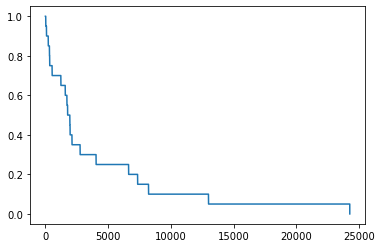

In [97]:
run_exp = RunExperiment(1000, m, d, s, fixed_ones=True)

plt.plot(run_exp.get_sampling_losses(100000), label = 'beta=100')

In [ ]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
best_beta = 0
best_loss = math.inf
best_iterations = math.inf

for beta in [10, 20, 30, 50, 80, 100, 200, 500, 1000]: 
    print('beta=', beta)
    loss, n_iterations = run_multiple_experiments(10, beta, m, d, s, fixed_ones=True, sign=False, iterations = iterations)

    if loss <= best_loss and n_iterations <= best_iterations: 
        best_beta = beta
        best_loss = loss
        best_iterations = n_iterations

print('beta=', best_beta, 'n_iterations=',best_iterations, best_loss)

In [ ]:
best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [0.01, 0.05, 0.1, 0.5, 1, 5, 10]: 
    for increse_every in [2, 5, 10, 100, 1000, 1500, 2000, 3000]: 
        for multiplicative_increase in [1.00001,1.0001, 1.0005, 1.001, 1.01, 1.1, 1.2, 1.3]:
            mse, required_iterations = run_multiple_experiments(5, beta, m, d, s, fixed_ones=True, sign=False, iterations = iterations, change_beta_every= increse_every, update_beta=lambda x : x * multiplicative_increase)
            # mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}
                print(best_params_and_scores, 'required_iterations', required_iterations)

print(best_mse, best_n_iterations)
print(best_params_and_scores)

In [ ]:
losses_with_different_m = []
m_values = np.arange(250 , 2250, 250)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}')
    beta =  10
    increase_every = 1500
    multiplicative_increase =  1.00001
    mse, n_iterations = run_multiple_experiments(1, beta, m_value, d, s, fixed_ones=False, sign=False, iterations = iterations, change_beta_every= increase_every, update_beta=lambda x : x * multiplicative_increase)
    print(n_iterations)
    losses_with_different_m.append(mse)


plt.plot(m_values, losses_with_different_m) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('img/q1_ex6_minimum_m_to_recover.jpg')


# Question 3

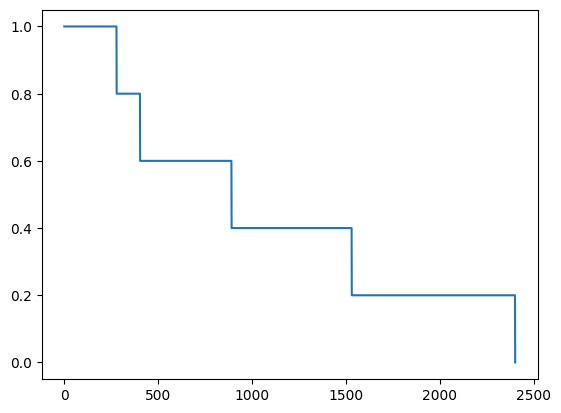

In [14]:
m3 = 100
d3 = 500
s3 = d3/100
#beta = 2
iterations3 = 100*d3

run_exp = RunExperiment(1, m3, d3, s3, fixed_ones=True, sign= True)

plt.plot(run_exp.get_sampling_losses(10000), label = 'beta=100')

In [ ]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
best_beta = 0
best_loss = math.inf
best_iterations = math.inf

for beta in [10, 20, 30, 50, 80, 100, 200, 500, 1000]: 
    print('beta=', beta)
    loss, n_iterations = run_multiple_experiments(10, beta, m, d, s, fixed_ones=True, sign=True, iterations = iterations)

    if loss <= best_loss and n_iterations <= best_iterations: 
        best_beta = beta
        best_loss = loss
        best_iterations = n_iterations

print('beta=', best_beta, 'n_iterations=',best_iterations, best_loss)

In [ ]:
best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [0.01, 0.05, 0.1, 0.5, 1, 5, 10]: 
    for increse_every in [2, 5, 10, 100, 1000, 1500, 2000, 3000]: 
        for multiplicative_increase in [1.00001,1.0001, 1.0005, 1.001, 1.01, 1.1, 1.2, 1.3]:
            mse, required_iterations = run_multiple_experiments(5, beta, m, d, s, fixed_ones=True, sign=True, iterations = iterations, change_beta_every= increse_every, update_beta=lambda x : x * multiplicative_increase)
            # mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}
                print(best_params_and_scores, 'required_iterations', required_iterations)

print(best_mse, best_n_iterations)
print(best_params_and_scores)

In [ ]:
losses_with_different_m = []
m_values = np.arange(250 , 2250, 250)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}')
    beta =  10
    increase_every = 1500
    multiplicative_increase =  1.00001
    mse, n_iterations = run_multiple_experiments(1, beta, m_value, d, s, fixed_ones=True, sign=theta_true, iterations = iterations, change_beta_every= increase_every, update_beta=lambda x : x * multiplicative_increase)
    print(n_iterations)
    losses_with_different_m.append(mse)


plt.plot(m_values, losses_with_different_m) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('img/q1_ex6_minimum_m_to_recover.jpg')
